In [44]:
# Helper packages
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle
import math
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

# Modeling and resampling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Parkinson's Disease Prediction
Pakinson's disease ia a neurodegenerative disorder of centeral nervious system that causes partial or full loss of motor reflexes, behaviour, speech, mental processing. Symptoms start gradually, sometimes starting with a barely noticeable tremor in just one hand.

Stusies concerned with Parkinson's disease focus on symptoms like poor balance, slowness in movement or stiffness of some body parts especially voice problems.

This dataset is composed of a range of biomedical voice measurements from 42 
people with early-stage Parkinson's disease recruited to a six-month trial of
a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

**The main aim of the data is to predict *Unified Parkinson's Disease Rating Scale (UPDRS)* from the 16 voice measures.**



In [45]:
parkinsons_df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data')

In [46]:
parkinsons_df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [47]:
print('The size of Parkinsons dataset is ',parkinsons_df.shape)

The size of Parkinsons dataset is  (5875, 22)


Parkinson's dataset consists of 5875 row. Each row is a voice recording from patient with Parkinson's disease. 

It also includs 22 columns wich descripe as below

Description of the variables

* **Subject** : Integer that uniquely identifies each subject
* **Age** : Subject age
* **sex** : Subject gender '0' - male, '1' - female
* **test_time** : Time since recruitment into the trial. The integer part is the number of days since recruitment.
* **motor_UPDRS** : Clinician's motor UPDRS score, linearly interpolated
* **total_UPDRS** :Clinician's total UPDRS score, linearly interpolated
* **Jitter(%),Jitter(Abs),Jitter** :RAP,Jitter:PPQ5,Jitter:DDP - Several measures of variation in fundamental frequency
* **Shimmer, Shimmer (dB), Shimmer. APQ3, Shimmer. APQ5, Shimmer. APQ11, Shimmer. DDA** :Several measures of variation in amplitude (Amplitude parameters) 
* **NHR, HNR:** Two measures of ratio of noise to tonal components in the voice
* **RPDE** : A nonlinear dynamical complexity measure
* **DFA** :Signal fractal scaling exponent
* **PPE** : A nonlinear measure of fundamental frequency variation

## 1. Feature Engineering and EDA

### 1.1. Random Sampling

In [48]:
train, test = train_test_split(parkinsons_df, test_size=0.3, random_state=123)

In [49]:
x_train = train.drop('total_UPDRS', axis=1)
y_train = train['total_UPDRS']

x_test = test.drop('total_UPDRS', axis = 1)
y_test = test['total_UPDRS']

In [50]:
x_train_o=x_train.copy()
x_test_o=x_test.copy()
y_train_o=y_train.copy()
y_test_o=y_test.copy()

### 1.2. Target Engineering

The target in the data set is *total_UPDRS* which represents the presence and severity of Parkinson's disease symptoms. It spans the range 0-176, with 0 representing healthy
state and 176 total disability


In [51]:
parkinsons_df.describe()['total_UPDRS']

count    5875.000000
mean       29.018942
std        10.700283
min         7.000000
25%        21.371000
50%        27.576000
75%        36.399000
max        54.992000
Name: total_UPDRS, dtype: float64

After assessing *total_UPDRS*, we notice that that the scores were 29.01 ± 10.7, min. 7, max. 54, median 26 points for total
UPDRS.  

Now, we'll assess the distribution of the target variable.

(array([111.,  13.,  39.,  44.,  42., 106., 114., 150.,  92., 184., 145.,
        137., 215., 227., 343., 207., 133., 168., 256., 145., 157.,  80.,
        105.,  89., 149.,  94., 104., 124.,  85.,  46.,  40.,  15.,  11.,
         12.,  30., 100.]),
 array([ 7.        ,  8.33311111,  9.66622222, 10.99933333, 12.33244444,
        13.66555556, 14.99866667, 16.33177778, 17.66488889, 18.998     ,
        20.33111111, 21.66422222, 22.99733333, 24.33044444, 25.66355556,
        26.99666667, 28.32977778, 29.66288889, 30.996     , 32.32911111,
        33.66222222, 34.99533333, 36.32844444, 37.66155556, 38.99466667,
        40.32777778, 41.66088889, 42.994     , 44.32711111, 45.66022222,
        46.99333333, 48.32644444, 49.65955556, 50.99266667, 52.32577778,
        53.65888889, 54.992     ]),
 <a list of 36 Patch objects>)

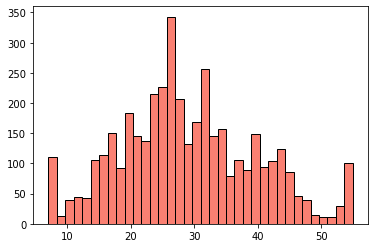

In [52]:
plt.hist(y_train, color = 'salmon', edgecolor = 'black', bins = int(180/5))

The target variable as shown in the plot above is not skewed and it is normally distrebuted. So, There is no need to apply transformation usin the log, box cox or yeo johnson.

### 1.2. Missingniss Handeling

In [53]:
print('The missing values in Parkinsons Telemonetoring data are ',parkinsons_df.isnull().sum().sum())

The missing values in Parkinsons Telemonetoring data are  0


As above the dataset has no missing values. So, we don't have to apply any of the missing values handleng methods such as: Imputation.

### 1.3. Feature filtering

Assessing the variance across the features. 

In [54]:
thresholder = VarianceThreshold()
thresholder.fit_transform(x_train)

array([[21.     , 73.     ,  0.     , ...,  0.45239,  0.69349,  0.23968],
       [ 8.     , 73.     ,  1.     , ...,  0.52245,  0.67575,  0.15161],
       [15.     , 65.     ,  0.     , ...,  0.44169,  0.67883,  0.14879],
       ...,
       [ 9.     , 68.     ,  0.     , ...,  0.58004,  0.70404,  0.29972],
       [25.     , 76.     ,  0.     , ...,  0.66059,  0.56084,  0.22049],
       [26.     , 49.     ,  0.     , ...,  0.56374,  0.70793,  0.2489 ]])

In [55]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[thresholder.get_support()]]

print(len(constant_columns))

0


With help of *VarianceThreshold*, the dataset doesn't contain zero and near-zero features

### 1.4. Numeric feature engineering

All the features are numeric except *sex* feature. Below, we'll assess the numerical features distribution.

In [56]:
numeric_f=[cols for cols in x_train.columns if cols!='sex']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


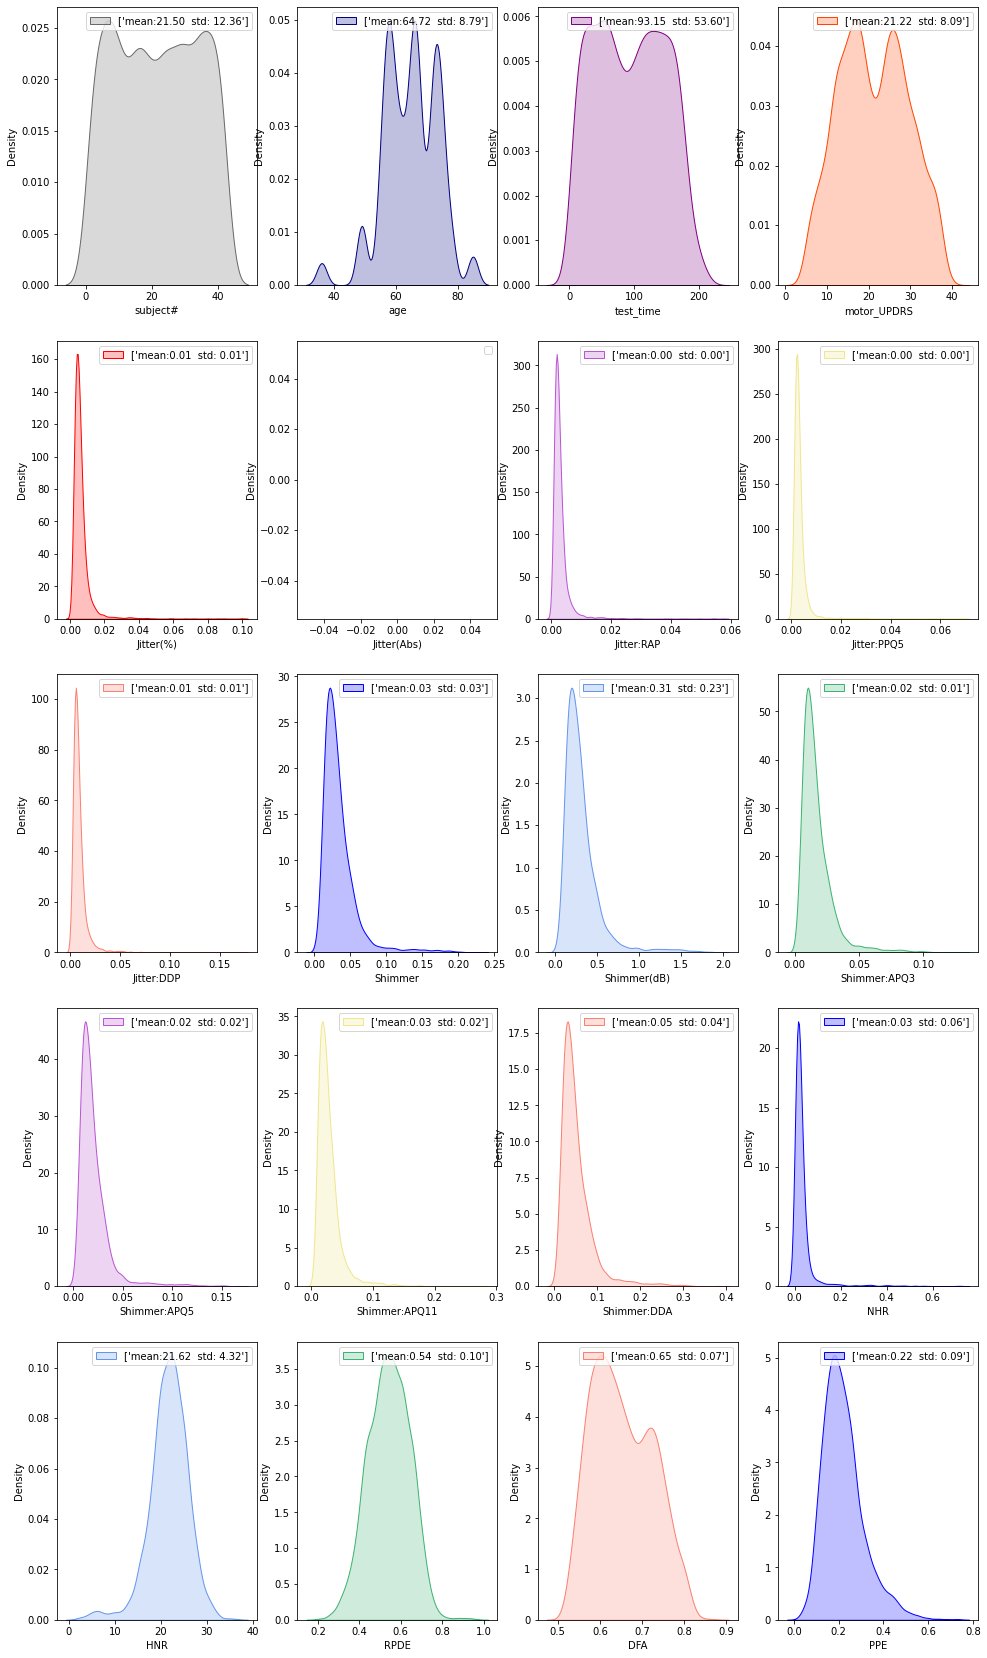

In [57]:
color = ['dimgray','navy','purple','orangered', 'red', 'green' ,'mediumorchid', 'khaki', 'salmon', 'blue','cornflowerblue','mediumseagreen','mediumorchid', 'khaki', 'salmon', 'blue','cornflowerblue','mediumseagreen','salmon', 'blue']
 
color_ind=0
n_row = 5
n_col = 4
n_sub = 1 
plt.rcParams["legend.loc"] = 'upper right'
fig = plt.figure(figsize=(8,14))
plt.subplots_adjust(left=-0.3, right=1.3,bottom=-0.3,top=1.3)
for i in (np.arange(0,20,1)):
    plt.subplot(n_row, n_col, n_sub)
    sns.kdeplot(x_train.loc[:,numeric_f[i]],color=color[color_ind],shade=True,
                 label=['mean:'+str('{:.2f}'.format(x_train.loc[:,numeric_f[i]].mean()))
                        +'  ''std: '+str('{:.2f}'.format(x_train.loc[:,numeric_f[i]].std()))])
    
    plt.xlabel(numeric_f[i])
    plt.legend()                    
    n_sub+=1
    color_ind+=1
plt.show()

Jitter and shimmer featurs are showing a signeficant skewniss.

In [58]:
jitter_shimmer_f=[col for col in x_train.columns if 'Jitter' in col or 'Shimmer' in col or col=='NHR']

In [59]:
jitter_shimmer_f

['Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'Shimmer:DDA',
 'NHR']

In [60]:
for f in jitter_shimmer_f:
    x_train[f],fitted_lambda=stats.boxcox(x_train[f])

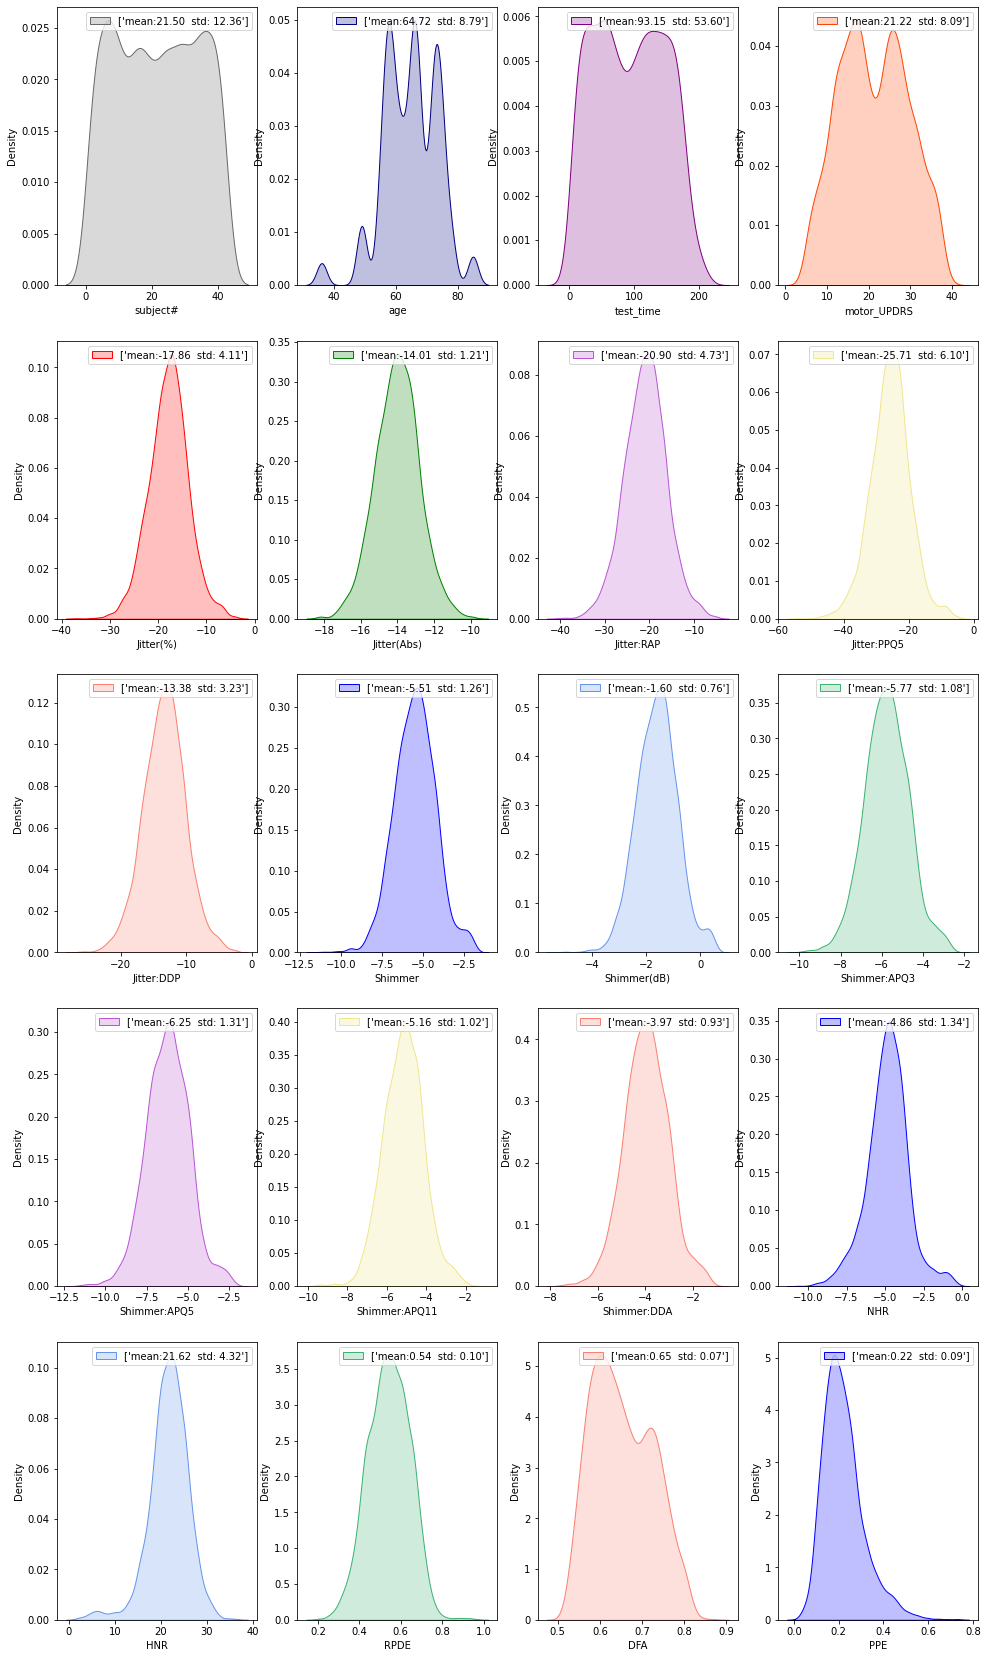

In [61]:
color = ['dimgray','navy','purple','orangered', 'red', 'green' ,'mediumorchid', 'khaki', 'salmon', 'blue','cornflowerblue','mediumseagreen','mediumorchid', 'khaki', 'salmon', 'blue','cornflowerblue','mediumseagreen','salmon', 'blue']
 
color_ind=0
n_row = 5
n_col = 4
n_sub = 1 
plt.rcParams["legend.loc"] = 'upper right'
fig = plt.figure(figsize=(8,14))
plt.subplots_adjust(left=-0.3, right=1.3,bottom=-0.3,top=1.3)
for i in (np.arange(0,20,1)):
    plt.subplot(n_row, n_col, n_sub)
    sns.kdeplot(x_train.loc[:,numeric_f[i]],color=color[color_ind],shade=True,
                 label=['mean:'+str('{:.2f}'.format(x_train.loc[:,numeric_f[i]].mean()))
                        +'  ''std: '+str('{:.2f}'.format(x_train.loc[:,numeric_f[i]].std()))])
    
    plt.xlabel(numeric_f[i])
    plt.legend()                    
    n_sub+=1
    color_ind+=1
plt.show()

As we can see above, jitter and shimmer are normalized. 

### 1.5. Categorical feature engineering

5. Assess the categorical features.
- Are categorical levels equally spread out across the features or is “lumping” occurring?
- Which values do you think should be one-hot or dummy encoded versus label encoded? Why?


The dataset has only one categorical feature which is *sex* and it preprocessed using *Lable encoding* method where gender '0' - male, '1' - female.

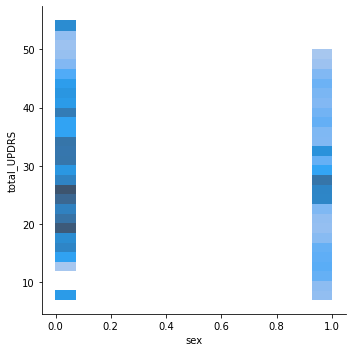

In [62]:
sns.displot(parkinsons_df, x="sex", y='total_UPDRS')

###  1.6 Correlation Analysis

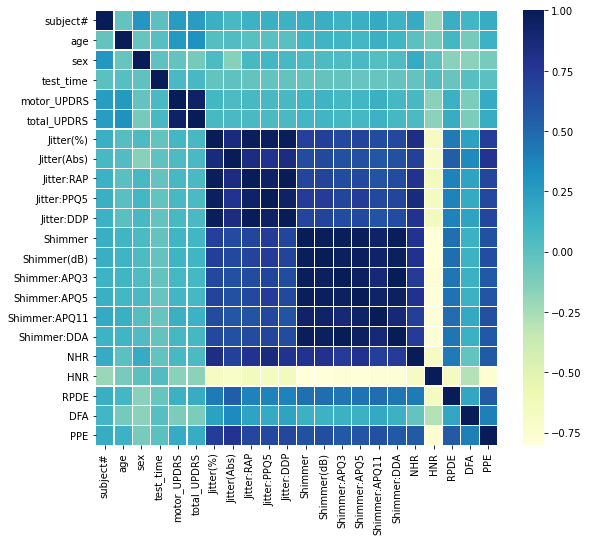

In [63]:
corrmat = parkinsons_df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

From the correlation can see the following:
- all the jitter variables highly correlate with Shimmer variables.
- High correlation between the motor UPDRS and total_UPDRS 
- HNR variable is not correlated to the rest of the variables.
- High correlation between PPE variable and Jitter and Shimmer variables.

In order to overcome the multi-collinearity problem, we'll apply the PCA model.

### 1.6. KNN Model

6. Execute a basic feature engineering process.
- First, apply a KNN model to your data without pre-applying feature engineering processes.
- Create and a apply a blueprint of feature engineering processes that you think will help your model improve.
- Now reapply the KNN model to your data that has been feature engineered.
- Did your model performance improve?

#### KNN

In [71]:
numerical_ix = x_train_o.select_dtypes(include=['int64', 'float64']).columns


In [72]:
numerical_ix

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'Jitter(%)',
       'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer',
       'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11',
       'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [117]:

preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_ix)])

knn_fit_p = Pipeline(steps=[('preprocessor', preprocessor),
                            ('pca', PCA(n_components=19)),
                          ('knn', KNeighborsRegressor(metric='euclidean'))])

In [147]:
# Specify resampling strategy
cv = RepeatedKFold(n_splits=10, n_repeats=5)

# Create grid of hyperparameter values
hyper_grid = {'knn__n_neighbors': range(3, 26)}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn_fit_p, hyper_grid, cv=cv, scoring='neg_mean_squared_error')
results = grid_search.fit(x_train_o, y_train_o)

In [148]:
# Best model's cross validated RMSE
knn_rmse=math.sqrt(abs(results.best_score_))
knn_rmse

2.0115239769160542

In [149]:
# Best model's k value
results.best_estimator_.get_params().get('knn__n_neighbors')

3

In [150]:
# All RMSE results
np.sqrt(np.abs(results.cv_results_['mean_test_score']))

array([2.01152398, 2.01837788, 2.03390956, 2.05887763, 2.08894766,
       2.12369883, 2.15555346, 2.19327676, 2.22461322, 2.2513197 ,
       2.27679366, 2.31005614, 2.34593048, 2.3827132 , 2.41552924,
       2.44040209, 2.46792425, 2.4936632 , 2.52399251, 2.5562934 ,
       2.58460818, 2.61184372, 2.63961342])

In [151]:

# Plot all RMSE results
all_rmse = pd.DataFrame({'k': range(3, 26), 'RMSE': np.sqrt(np.abs(results.cv_results_['mean_test_score']))})

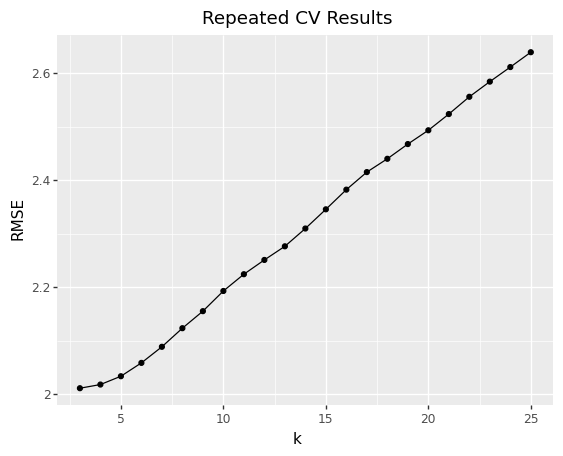

<ggplot: (8770534884735)>

In [152]:
(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Repeated CV Results"))

The performance of the preprocessed KNN model results a better RMSE than the non processed one

---

### Liner Regresion



In [87]:
pca_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('pca', PCA(n_components=19)),
                          ('regression', LinearRegression())])

- Perform a grid search over several components.


In [88]:
# set up CV
pca_model_cv = cross_val_score(pca_pipe, 
                        x_train_o, 
                        y_train_o,
                        scoring= 'neg_mean_squared_error', 
                        cv = cv)

In [132]:
# cv results
rmse_results_pca=[]
for i in range(0,len(pca_model_cv),1):
    rmse_results_pca.append(math.sqrt(abs(pca_model_cv[i])))
lr_rmse=np.min(rmse_results_pca)
lr_rmse

2.9947960691508015

### Regularized Regression model (Lasso)

In [133]:
reg_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', PCA(n_components=19)),
                           ('regr', Lasso())])

A grid search across alpha parameter values ranging between 0–1.

In [135]:
param_grid = {'regr__alpha': np.logspace(-4, 1, 6),}

In [136]:
grid = GridSearchCV(reg_pipe, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)

In [137]:
reg_results=grid.fit(x_train_o, y_train_o)

Fitting 50 folds for each of 6 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.0s finished


In [138]:
#RMSE
reg_rmse=math.sqrt(abs(reg_results.best_score_))

In [139]:
reg_rmse

0.9531939580978336

The optimal alpha and lambda values?

In [140]:
reg_results.best_params_

{'regr__alpha': 0.001}

- Identify the most influential features for this model.


In [101]:
regulizer = reg_results.best_estimator_.named_steps['regr']
n = regulizer.coef_

In [102]:
regulizer = reg_results.best_estimator_.named_steps['regr']
importance = regulizer.coef_
features_col=x_train_o.columns
fea_vip=pd.DataFrame(zip(features_col,importance),columns=['feature','importance'])
fea_vip.sort_values(by='importance',axis=0,ascending=False,inplace=True)
fea_vip

,feature,importance
4,motor_UPDRS,9.789018
13,Shimmer:APQ5,1.979171
7,Jitter:RAP,1.677962
1,age,0.593600
0,subject#,0.525490
6,Jitter(Abs),0.416434
18,RPDE,0.361994
3,test_time,0.187435
11,Shimmer(dB),0.184200
8,Jitter:PPQ5,0.130827


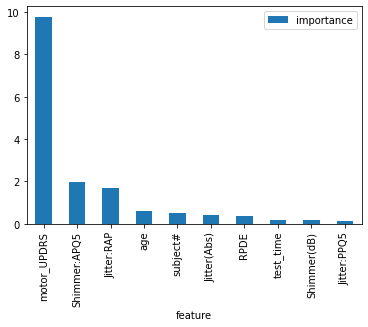

In [103]:
fea_vip[:10].plot(kind='bar',x='feature', y='importance')
plt.xticks(rotation = 90) 
plt.show()

motor_UPDRS has the most positive impact on the response variable. However, Jitter(%) has the most negative impact on the target.

---

## 3. Random Forest

In [143]:
rf = RandomForestRegressor(max_features = 21, random_state = 1)
# set up CV
rf_model_cv = cross_val_score(rf, 
                        x_train_o, 
                        y_train_o,
                        scoring= 'neg_mean_squared_error', 
                        cv = cv)

In [144]:
rmse_results_rf=[]
for i in range(0,len(rf_model_cv),1):
    rmse_results_rf.append(math.sqrt(abs(rf_model_cv[i])))
rf_rmse=np.min(rmse_results_rf)
rf_rmse

0.2873665434776548

---

In [146]:
print('KNN RMSE',knn_rmse)
print('Linear Regrission RMSE',lr_rmse)
print('Lasso RMSE',reg_rmse)
print('Random Forest RMSE',rf_rmse)

KNN RMSE 2.272791313510273
Linear Regrission RMSE 2.9947960691508015
Lasso RMSE 0.9531939580978336
Random Forest RMSE 0.2873665434776548


# Conclusion 
Random forest has the best performance as it achieved the smallest RMSE.